In [1]:
import sklearn
import keras
import nltk
import pandas as pd
import numpy as np
import re
import codecs
pd.set_option('display.max_colwidth', 1000)


In [2]:
input_file = codecs.open("socialmedia_relevant_cols.csv", "r")
output_file = open("socialmedia_relevant_cols_clean.csv", "w")

def sanitize_characters(raw, clean):    
    for line in input_file:
        out = line
        output_file.write(line)
sanitize_characters(input_file, output_file)

In [3]:
questions = pd.read_csv("socialmedia_relevant_cols_clean.csv")
questions.columns=['text', 'choose_one', 'class_label']
questions.dropna(axis = 0, how = 'any', subset = ['text'], inplace = True)
questions.head()

text  \
0                                                                Just happened a terrible car crash   
1                             Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all   
2                                  Heard about #earthquake is different cities, stay safe everyone.   
3  there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all   
4                                                            Forest fire near La Ronge Sask. Canada   

  choose_one  class_label  
0   Relevant          1.0  
1   Relevant          1.0  
2   Relevant          1.0  
3   Relevant          1.0  
4   Relevant          1.0

## Here we can see texts split across multiple rows, i.e, unclean data

In [4]:
questions[240:250].copy()

text  \
241            Horrible Accident Man Died In Wings Of  ��Airplane �� 29-07-2015. WTF You Can �t Believe Your EYES  -... http://t.co/6fFyLAjWpS   
242                                                                                                                                     #NAME?   
244                                                                             The accident left a little bit trauma for her. Although she's    
246                                                                                                                                         +"   
247          36 years ago today baseball lost one of its greats in an airplane accident. RIP Captain. #Yankees @yankees http://t.co/iNKU28vjJj   
248   Experts in France begin examining airplane debris found on Reunion Island: French air accident experts on Wedn... http://t.co/miw2i0pQxz   
249                                                                OMG Horrible Accident Man Died in Wings of Airplane. http://t.co/xDxDPrcPnS   
250  #BreakingNews Experts in France begin examining airplane debris found on Reunion Island: French air accident e...  http://t.co/3XIcUvlvlJ   
251                                                                                                       #OMG! I don't believe this. #RIP bro   
252                                                               #AirPlane #Accident #JetEngine #TurboJet #Boing #G90 http://t.co/KXxnSZp6nk"   

    choose_one  class_label  
241   Relevant          1.0  
242        NaN          NaN  
244        NaN          NaN  
246   Relevant          1.0  
247   Relevant          1.0  
248   Relevant          1.0  
249   Relevant          1.0  
250   Relevant          1.0  
251        NaN          NaN  
252   Relevant          1.0

### Writing logic to combine texts split across multiple rows to combine to a single row

In [5]:
temp = ''
for index, i in questions.iterrows():
    if(pd.isna(i['class_label'])):
        temp += (str(i['text']) + ' ')
        print(temp)
        
    elif(temp != ''):
        temp += (str(i['text']) + ' ')
        questions.loc[index, 'text'] = temp
        print(i['text'])
        temp = ''
    
questions = questions.dropna(how = 'any', axis = 0).reset_index(drop = True)

Man wife get six years jail for setting ablaze niece 
http://t.co/eV1ahOUCZA"
mom: 'we didn't get home as fast as we wished'  
mom: 'we didn't get home as fast as we wished'  me: 'why is that?' 
mom: 'there was an accident and some truck spilt mayonnaise all over ??????"
'The man who can drive himself further once the effort gets painful is the man who will win.'  
Roger Bannister"
Schoolboy  - Aftershock (Original Mix) 
Schoolboy  - Aftershock (Original Mix) Excision &amp; Skism  - SEXisM (Far Too Loud Remix) 
Firebeatz Schella  - Dear New... http://t.co/JQLzUA6YzQ"
&gt;&gt; $15 Aftershock : Protect Yourself and Profit in the Next Global Financial... ##book http://t.co/f6ntUc734Z 
@esquireattire"
This is unbelievably insane. 
#man #airport #airplane #aircraft #aeroplane #runway #accident #freaky �_ https://t.co/cezhq7CzLl"
See how a judge ruled in this 2009 accident at #JFK Airport? involving Korean Air?. 
http://t.co/Yh1cGlN3rl http://t.co/6F5ShPKjOB"
#NAME? 
#NAME? The accident left

### After processing unclean data

In [6]:
questions[240:250]

text  \
240                                                                                                                  I had a airplane accident.   
241                                                                        My phone looks like it was in a car ship airplane accident. Terrible   
242                                    Statistically I'm at more of risk of getting killed by a cop than I am of dying in an airplane accident.   
243                                                     airplane crashes on house in Colombia 12 people die in accident https://t.co/ZhJlfLBHZL   
244                                                                              The shooting or the airplane accident  https://t.co/iECc1JDOub   
245    Could a drone cause an airplane accident? Pilots worried about use of drones esp. in close vicinity of airports http://t.co/kz35rGngJF #   
246                        Early wake up call from my sister begging me to come over &amp; ride w/her in the ambulance to the hospital #RODKiai   
247                              http://t.co/AY6zzcUpnz Twelve feared killed in Pakistani air ambulance helicopter crash http://t.co/sC9dNS41Mc   
248  Two air ambulances on scene of serious crash between two cars and lorry in ... - http://t.co/9pFEaQeSki http://t.co/fntG70rnkx | #EMSNe �_   
249                                  Twelve feared killed in Pakistani air ambulance helicopter crash - Reuters http://t.co/mDnUGVuBwN #yugvani   

       choose_one  class_label  
240      Relevant          1.0  
241  Not Relevant          0.0  
242  Not Relevant          0.0  
243      Relevant          1.0  
244      Relevant          1.0  
245      Relevant          1.0  
246      Relevant          1.0  
247      Relevant          1.0  
248      Relevant          1.0  
249      Relevant          1.0

In [7]:
questions.tail()

text  \
10782  Wreckage 'Conclusively Confirmed' as From MH370: Malaysia PM: Investigators and the families of those who were... http://t.co/1YIxFG1Hdy   
10783                                                       Wreckage 'conclusively confirmed' as from missing flight MH370 via @YahooNewsDigest   
10784  Wreckage 'Conclusively Confirmed' as From MH370: Malaysia PM: Investigators and the families of those who were... http://t.co/5EBpYbFH4D   
10785                             Wrecked an hour on YouTube with @julian_lage @GrantGordy &amp; @RossMartin7 and now it's practice time again.   
10786         late night mcdonalds with friends = hilarious although my car is wrecked and there's half a steak pastie in the industrial estate   

         choose_one  class_label  
10782      Relevant          1.0  
10783      Relevant          1.0  
10784      Relevant          1.0  
10785  Not Relevant          0.0  
10786  Not Relevant          0.0

In [8]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10787 entries, 0 to 10786
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   text         10787 non-null  object 
 1   choose_one   10787 non-null  object 
 2   class_label  10787 non-null  float64
dtypes: float64(1), object(2)
memory usage: 252.9+ KB


In [9]:
def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.lower()
    return df

questions = standardize_text(questions, "text")

questions.to_csv("clean_data.csv")
questions.head()

C:\Users\jasme\AppData\Local\Temp\ipykernel_16980\1989450400.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df[text_field] = df[text_field].str.replace(r"http\S+", "")
C:\Users\jasme\AppData\Local\Temp\ipykernel_16980\1989450400.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df[text_field] = df[text_field].str.replace(r"@\S+", "")
C:\Users\jasme\AppData\Local\Temp\ipykernel_16980\1989450400.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")


text  \
0                                                                just happened a terrible car crash   
1                             our deeds are the reason of this  earthquake may allah forgive us all   
2                                  heard about  earthquake is different cities, stay safe everyone    
3  there is a forest fire at spot pond, geese are fleeing across the street, i cannot save them all   
4                                                            forest fire near la ronge sask  canada   

  choose_one  class_label  
0   Relevant          1.0  
1   Relevant          1.0  
2   Relevant          1.0  
3   Relevant          1.0  
4   Relevant          1.0

In [10]:
clean_questions = pd.read_csv("clean_data.csv")
clean_questions.head()

Unnamed: 0  \
0           0   
1           1   
2           2   
3           3   
4           4   

                                                                                               text  \
0                                                                just happened a terrible car crash   
1                             our deeds are the reason of this  earthquake may allah forgive us all   
2                                  heard about  earthquake is different cities, stay safe everyone    
3  there is a forest fire at spot pond, geese are fleeing across the street, i cannot save them all   
4                                                            forest fire near la ronge sask  canada   

  choose_one  class_label  
0   Relevant          1.0  
1   Relevant          1.0  
2   Relevant          1.0  
3   Relevant          1.0  
4   Relevant          1.0

## Data Overview

In [11]:
clean_questions.groupby("class_label").count()

Unnamed: 0  text  choose_one
class_label                              
0.0                6141  6141        6141
1.0                4630  4630        4630
2.0                  16    16          16

In [12]:
clean_questions.head()

Unnamed: 0  \
0           0   
1           1   
2           2   
3           3   
4           4   

                                                                                               text  \
0                                                                just happened a terrible car crash   
1                             our deeds are the reason of this  earthquake may allah forgive us all   
2                                  heard about  earthquake is different cities, stay safe everyone    
3  there is a forest fire at spot pond, geese are fleeing across the street, i cannot save them all   
4                                                            forest fire near la ronge sask  canada   

  choose_one  class_label  
0   Relevant          1.0  
1   Relevant          1.0  
2   Relevant          1.0  
3   Relevant          1.0  
4   Relevant          1.0

In [13]:
from tqdm import tqdm
tqdm.pandas()

In [14]:
from nltk.tokenize import RegexpTokenizer
import swifter
pd.set_option('display.max_colwidth', 1000)

tokenizer = RegexpTokenizer(r'\w+')

clean_questions.dropna(how = 'any', axis = 0, inplace = True)

# Using swifter we can improve the processing speed via parallezing
clean_questions["tokens"] = clean_questions["text"].astype(str).swifter.apply(tokenizer.tokenize)

clean_questions.head()

Pandas Apply:   0%|          | 0/10787 [00:00<?, ?it/s]

Unnamed: 0  \
0           0   
1           1   
2           2   
3           3   
4           4   

                                                                                               text  \
0                                                                just happened a terrible car crash   
1                             our deeds are the reason of this  earthquake may allah forgive us all   
2                                  heard about  earthquake is different cities, stay safe everyone    
3  there is a forest fire at spot pond, geese are fleeing across the street, i cannot save them all   
4                                                            forest fire near la ronge sask  canada   

  choose_one  class_label  \
0   Relevant          1.0   
1   Relevant          1.0   
2   Relevant          1.0   
3   Relevant          1.0   
4   Relevant          1.0   

                                                                                                               tokens  
0                                                                           [just, happened, a, terrible, car, crash]  
1                                  [our, deeds, are, the, reason, of, this, earthquake, may, allah, forgive, us, all]  
2                                             [heard, about, earthquake, is, different, cities, stay, safe, everyone]  
3  [there, is, a, forest, fire, at, spot, pond, geese, are, fleeing, across, the, street, i, cannot, save, them, all]  
4                                                                       [forest, fire, near, la, ronge, sask, canada]

In [15]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

all_words = [word for tokens in clean_questions["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in clean_questions["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

153575 words total, with a vocabulary size of 18045
Max sentence length is 34


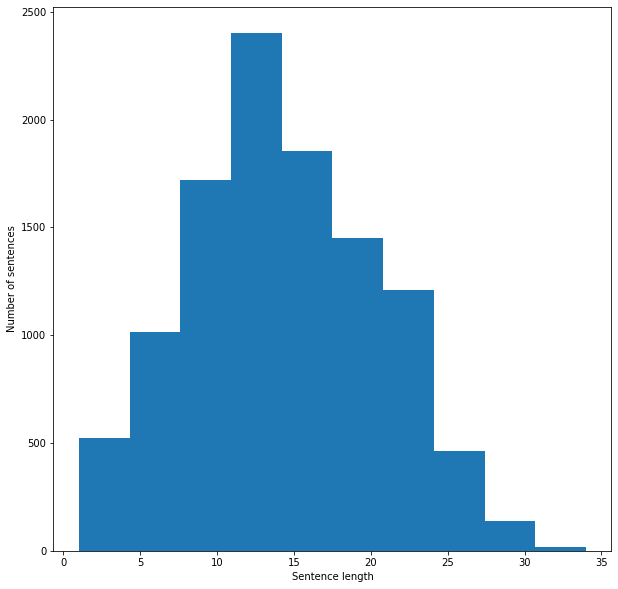

In [16]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()

## Machine Learning

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cv(data):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer



list_corpus = clean_questions["text"].tolist()
list_labels = clean_questions["class_label"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, 
                                                                                random_state=40)

X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

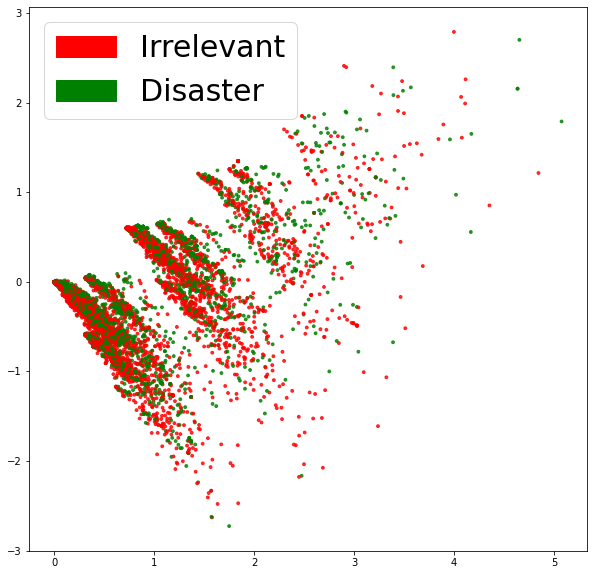

In [18]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches


def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['red','green']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            red_patch = mpatches.Patch(color='red', label='Irrelevant')
            green_patch = mpatches.Patch(color='green', label='Disaster')
            plt.legend(handles=[red_patch, green_patch], prop={'size': 30})


fig = plt.figure(figsize=(10, 10))          
plot_LSA(X_train_counts, y_train)
plt.show()

## Classification

In [19]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf.fit(X_train_counts, y_train)

y_predicted_counts = clf.predict(X_test_counts)

In [20]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.771, precision = 0.771, recall = 0.771, f1 = 0.771


### Exploring metrics

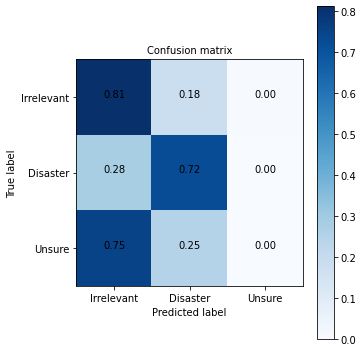

[[987 223   6]
 [261 677   0]
 [  3   1   0]]


In [21]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=10)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=10)
    plt.yticks(tick_marks, classes, fontsize=10)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="black", fontsize=10)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=10)
    plt.xlabel('Predicted label', fontsize=10)

    return plt

cm = confusion_matrix(y_test, y_predicted_counts)
fig = plt.figure(figsize=(5, 5))
plot = plot_confusion_matrix(cm, classes=['Irrelevant','Disaster','Unsure'], normalize=True, title='Confusion matrix')
plt.show()
print(cm)

Our classifier never predicts class 3, which is not surprising, seeing as it is critically undersampled. This is not very important here, as the label is not very meaningful. Our classifier creates more false negatives than false positives (proportionally). Depending on the use case, this seems desirable (a false positive is quite a high cost for law enforcement for example).

In [22]:
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

importance = get_most_important_features(count_vectorizer, clf, 10)

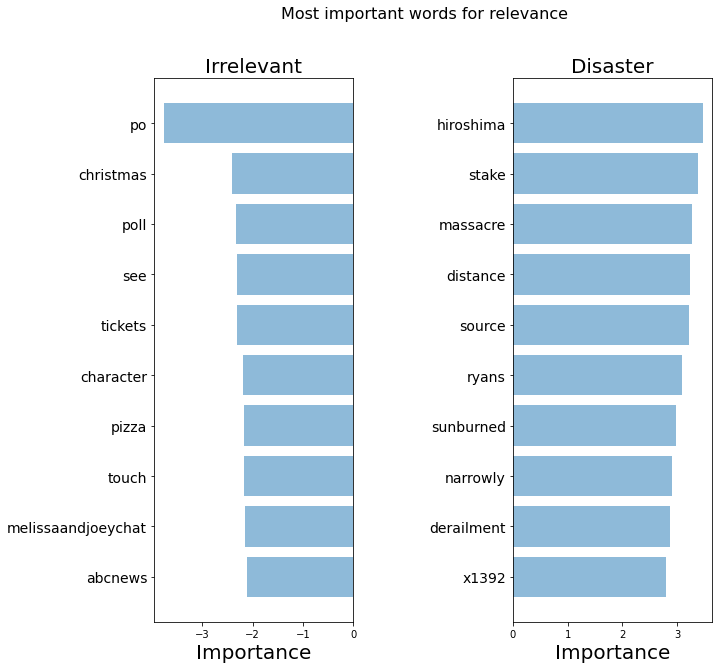

In [23]:
def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])
    
    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
    
    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]
    
    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]
    
    fig = plt.figure(figsize=(10, 10))  

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('Irrelevant', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('Disaster', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplots_adjust(wspace=0.8)
    plt.show()

top_scores = [a[0] for a in importance[1]['tops']]
top_words = [a[1] for a in importance[1]['tops']]
bottom_scores = [a[0] for a in importance[1]['bottom']]
bottom_words = [a[1] for a in importance[1]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")

## TF - IDF

In [24]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

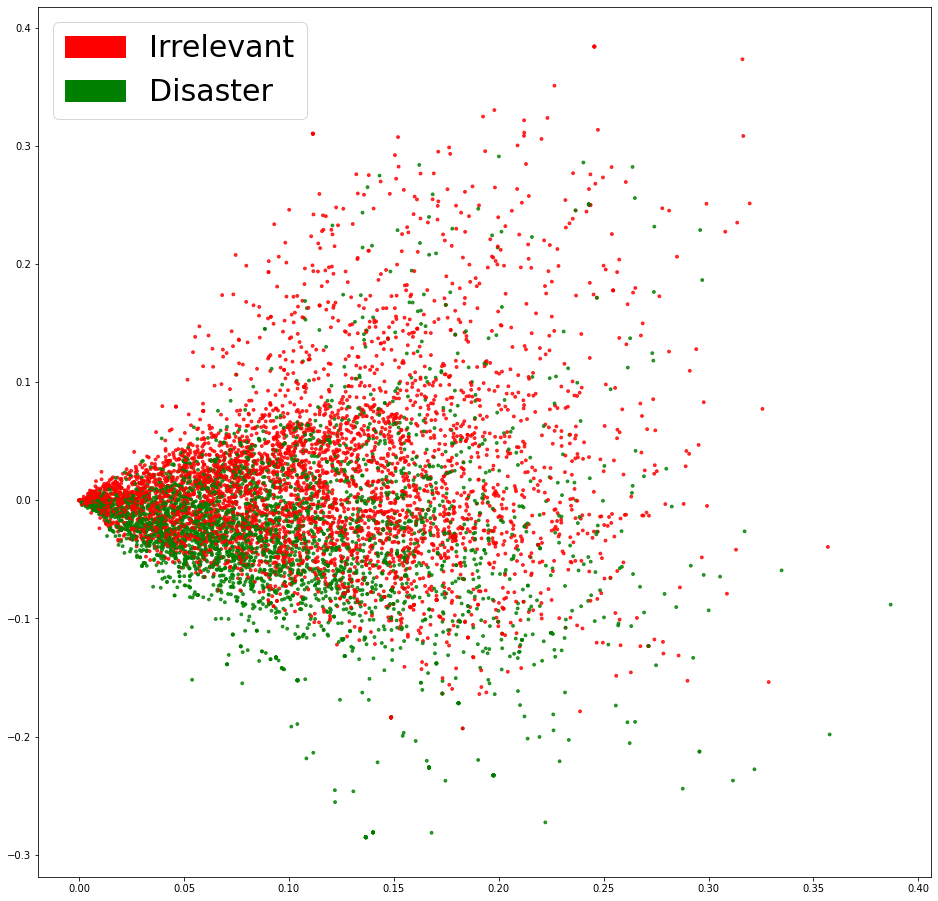

In [25]:
fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_tfidf, y_train)
plt.show()

In [26]:
clf_tfidf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf_tfidf.fit(X_train_tfidf, y_train)

y_predicted_tfidf = clf_tfidf.predict(X_test_tfidf)

In [27]:
accuracy_tfidf, precision_tfidf, recall_tfidf, f1_tfidf = get_metrics(y_test, y_predicted_tfidf)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tfidf, precision_tfidf, 
                                                                       recall_tfidf, f1_tfidf))

accuracy = 0.773, precision = 0.772, recall = 0.773, f1 = 0.772


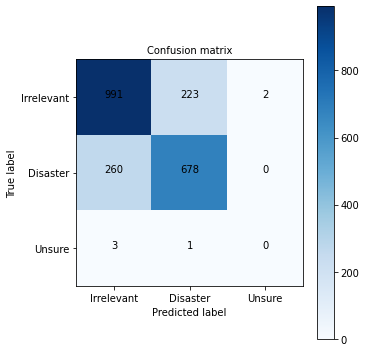

TFIDF confusion matrix
[[991 223   2]
 [260 678   0]
 [  3   1   0]]
BoW confusion matrix
[[987 223   6]
 [261 677   0]
 [  3   1   0]]


In [28]:
cm2 = confusion_matrix(y_test, y_predicted_tfidf)
fig = plt.figure(figsize=(5, 5))
plot = plot_confusion_matrix(cm2, classes=['Irrelevant','Disaster','Unsure'], normalize=False, title='Confusion matrix')
plt.show()
print("TFIDF confusion matrix")
print(cm2)
print("BoW confusion matrix")
print(cm)

## Coefficients linear regression

In [29]:
importance_tfidf = get_most_important_features(tfidf_vectorizer, clf_tfidf, 10)


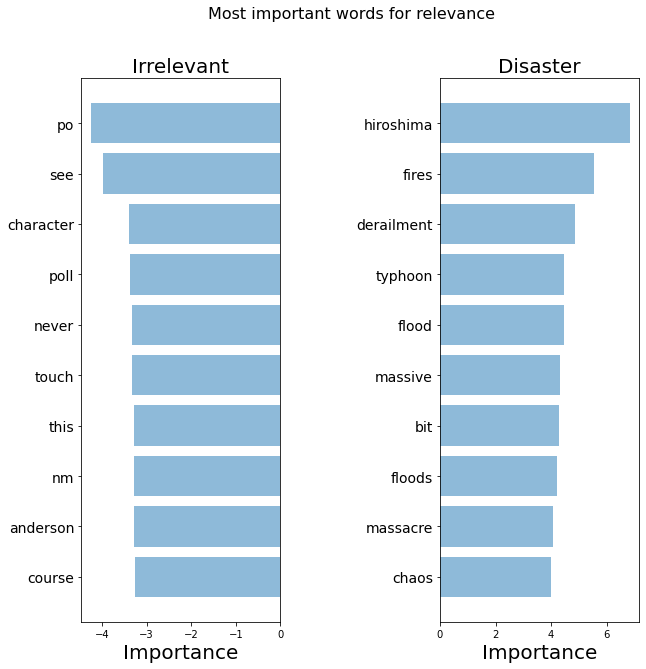

In [30]:
top_scores = [a[0] for a in importance_tfidf[1]['tops']]
top_words = [a[1] for a in importance_tfidf[1]['tops']]
bottom_scores = [a[0] for a in importance_tfidf[1]['bottom']]
bottom_words = [a[1] for a in importance_tfidf[1]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")

## Word2Vec

In [31]:
import gensim

# Load Google's pre-trained Word2Vec model.
word2vec_path = "~/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz"
word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

In [32]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_questions, generate_missing=False):
    embeddings = clean_questions['tokens'].apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

In [33]:
embeddings = get_word2vec_embeddings(word2vec, clean_questions)
X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(embeddings, list_labels, 
                                                                                        test_size=0.2, random_state=40)

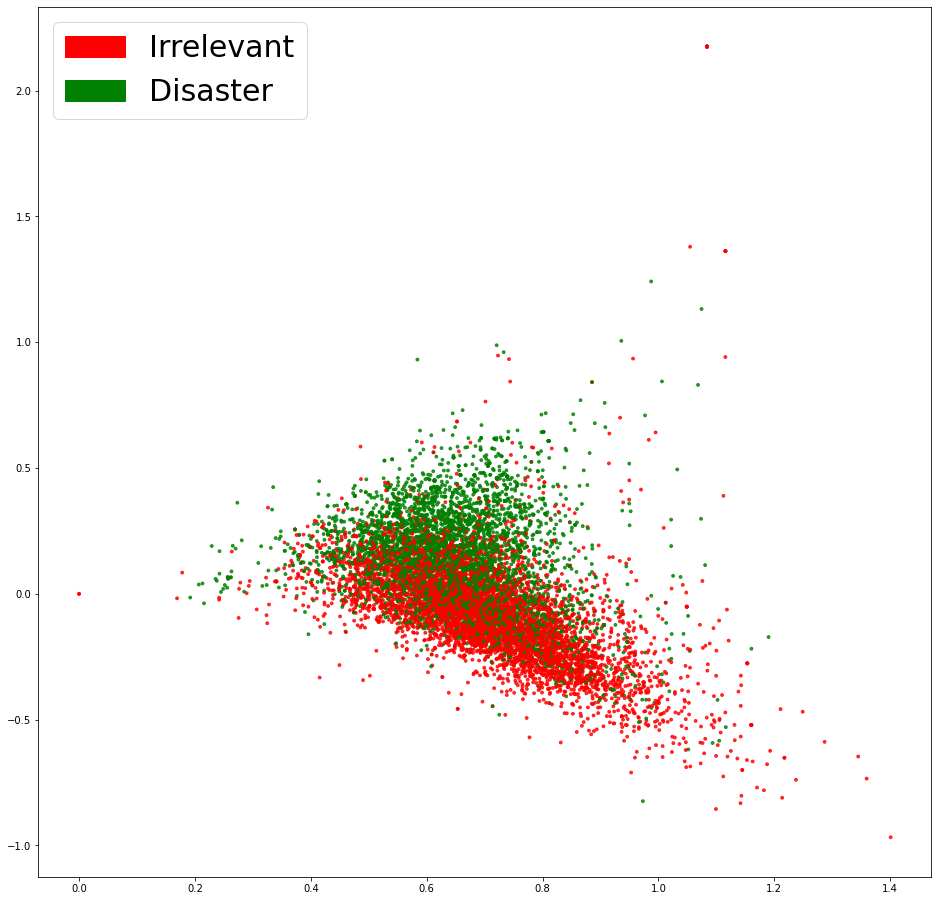

In [34]:
fig = plt.figure(figsize=(16, 16))          
plot_LSA(embeddings, list_labels)
plt.show()

In [35]:
clf_w2v = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', random_state=40)
clf_w2v.fit(X_train_word2vec, y_train_word2vec)
y_predicted_word2vec = clf_w2v.predict(X_test_word2vec)

In [36]:
accuracy_word2vec, precision_word2vec, recall_word2vec, f1_word2vec = get_metrics(y_test_word2vec, y_predicted_word2vec)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_word2vec, precision_word2vec, 
                                                                       recall_word2vec, f1_word2vec))

accuracy = 0.787, precision = 0.791, recall = 0.787, f1 = 0.789


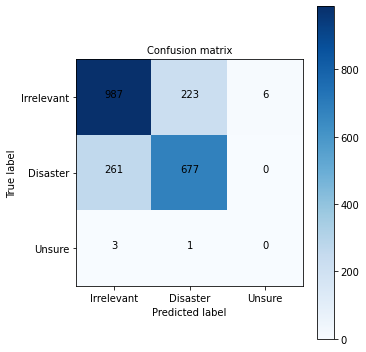

Word2Vec confusion matrix
[[988 219   9]
 [222 711   5]
 [  2   2   0]]
TFIDF confusion matrix
[[991 223   2]
 [260 678   0]
 [  3   1   0]]
BoW confusion matrix
[[987 223   6]
 [261 677   0]
 [  3   1   0]]


In [37]:
cm_w2v = confusion_matrix(y_test_word2vec, y_predicted_word2vec)
fig = plt.figure(figsize=(5, 5))
plot = plot_confusion_matrix(cm, classes=['Irrelevant','Disaster','Unsure'], normalize=False, title='Confusion matrix')
plt.show()
print("Word2Vec confusion matrix")
print(cm_w2v)
print("TFIDF confusion matrix")
print(cm2)
print("BoW confusion matrix")
print(cm)

## A more drilled down breakdown

In [38]:
from lime import lime_text
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer

X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(list_corpus, list_labels, test_size=0.2, 
                                                                                random_state=40)
vector_store = word2vec
def word2vec_pipeline(examples):
    global vector_store
    tokenizer = RegexpTokenizer(r'\w+')
    tokenized_list = []
    for example in examples:
        example_tokens = tokenizer.tokenize(example)
        vectorized_example = get_average_word2vec(example_tokens, vector_store, generate_missing=False, k=300)
        tokenized_list.append(vectorized_example)
    return clf_w2v.predict_proba(tokenized_list)

c = make_pipeline(count_vectorizer, clf)

In [39]:
def explain_one_instance(instance, class_names):
    explainer = LimeTextExplainer(class_names=class_names)
    exp = explainer.explain_instance(instance, word2vec_pipeline, num_features=6)
    return exp

def visualize_one_exp(features, labels, index, class_names = ["irrelevant","relevant", "unknown"]):
    exp = explain_one_instance(features[index], class_names = class_names)
    print('Index: %d' % index)
    print('True class: %s' % class_names[int(labels[index])])
    exp.show_in_notebook(text=True)

In [40]:
visualize_one_exp(X_test_data, y_test_data, 65)

Index: 65
True class: relevant


In [41]:
visualize_one_exp(X_test_data, y_test_data, 60)

Index: 60
True class: irrelevant


# LDA_VIZ

In [42]:
import numpy as np
import pandas as pd
from collections import defaultdict

import gensim
from gensim import corpora, models
from gensim.models import Phrases
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
%matplotlib inline

C:\Users\jasme\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\jasme\AppData\Local\Programs\Python\Python310\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [43]:
len(embeddings)

10787

In [44]:
df = pd.DataFrame(embeddings)

In [45]:
df.head()

0         1         2         3         4         5         6    \
0  0.088501  0.014114  0.062032 -0.030558  0.010203 -0.087891  0.028687   
1  0.066397  0.067068  0.104630  0.133094 -0.075205  0.018137  0.098821   
2  0.011980 -0.032498  0.074721  0.076864 -0.063253  0.032986 -0.046685   
3  0.045068  0.070105  0.039639  0.064408 -0.049935 -0.010710 -0.012278   
4  0.060896 -0.007996  0.001966  0.097552  0.126953 -0.000453  0.004883   

        7         8         9    ...       290       291       292       293  \
0 -0.113352  0.172404  0.115316  ... -0.049215  0.027710 -0.044840  0.142904   
1 -0.048086  0.081355  0.120897  ... -0.061016  0.070108 -0.074162 -0.037983   
2 -0.035799  0.198794  0.089261  ... -0.125122  0.010281 -0.086073  0.085414   
3 -0.077592  0.035191  0.089445  ... -0.077881 -0.002037 -0.086185  0.069641   
4 -0.101231 -0.016174  0.020891  ... -0.042480 -0.013410 -0.029018  0.119376   

        294       295       296       297       298       299  
0 -0.100098 -0.017731 -0.048218 -0.062297  0.012085 -0.040891  
1 -0.022320  0.044012 -0.006672 -0.035675  0.017123  0.039420  
2  0.019477  0.023248 -0.039537 -0.037896  0.013957 -0.038330  
3  0.005151  0.056943  0.001343 -0.035728  0.068102  0.018097  
4  0.048235  0.007708 -0.099470 -0.030239  0.050014  0.039224  

[5 rows x 300 columns]

In [46]:
texts = clean_questions['tokens'].to_list()

In [47]:
result = []
for tokens in texts:
    res = []
    for token in tokens:
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            res.append(token)
    result.append(res)

In [48]:
texts = result.copy()

In [49]:
# remove words that appear only once
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [[token for token in text if frequency[token] > 1]
         for text in texts]

In [50]:
# Create the dictionary
dictionary = corpora.Dictionary(texts)

# Filter out words that occur less than X documents, 
# or more than X% of the documents.
dictionary.filter_extremes(no_below=10, no_above=0.2)

# Create the corpus.  This is a Term Frequency 
# or Bag of Words representation.
corpus = [dictionary.doc2bow(text) for text in texts]

print(f'Number of unique tokens: {len(dictionary)}')
print(f'Number of documents: {len(corpus)}')

Number of unique tokens: 1534
Number of documents: 10787


In [51]:
dictionary[1]

'happened'

In [52]:
corpus[1]

[(3, 1), (4, 1), (5, 1)]

In [53]:
temp = dictionary[0]
id2word = dictionary.id2token

In [54]:
id2word

{0: 'crash',
 1: 'happened',
 2: 'terrible',
 3: 'allah',
 4: 'earthquake',
 5: 'reason',
 6: 'cities',
 7: 'different',
 8: 'heard',
 9: 'safe',
 10: 'stay',
 11: 'forest',
 12: 'save',
 13: 'spot',
 14: 'street',
 15: 'canada',
 16: 'near',
 17: 'asked',
 18: 'evacuation',
 19: 'expected',
 20: 'officers',
 21: 'orders',
 22: 'place',
 23: 'residents',
 24: 'california',
 25: 'people',
 26: 'wildfires',
 27: 'photo',
 28: 'school',
 29: 'sent',
 30: 'smoke',
 31: 'closed',
 32: 'county',
 33: 'lake',
 34: 'update',
 35: 'apocalypse',
 36: 'areas',
 37: 'causes',
 38: 'colorado',
 39: 'disaster',
 40: 'flash',
 41: 'flood',
 42: 'flooding',
 43: 'heavy',
 44: 'rain',
 45: 'streets',
 46: 'china',
 47: 'kills',
 48: 'soudelor',
 49: 'taiwan',
 50: 'typhoon',
 51: 'building',
 52: 'emergency',
 53: 'happening',
 54: 'area',
 55: 'coming',
 56: 'tornado',
 57: 'died',
 58: 'heat',
 59: 'wave',
 60: 'getting',
 61: 'gonna',
 62: 'haha',
 63: 'live',
 64: 'second',
 65: 'south',
 66: 'wait

## Manual topic modelling

In [55]:
%%time
model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=1000,
    alpha='auto',
    eta='auto',
    iterations=300,
    num_topics = 4,
    passes=10,
    eval_every=None,
    random_state=0,
    update_every=1
)

pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(model, corpus, dictionary, sort_topics=True)

pyLDAvis.display(lda_viz)

CPU times: total: 5.06 s
Wall time: 5.85 s


## Conclusions
1. The 4 topics look similar in size with cluster 1 being biggest in size and cluster 4 being smallest in size
2. The random state is set to 0 to ensure reproducibility of results
3. The n_topics = 4 gives us seperated clusters and helps us draw conclusions from the most commonly occuring words.
    1. The cluster 1 deals with terrorism topics
    2. Cluster 2 deals with Flight MH370
    3. Cluster 3 deals with looks like a mix of police related topics and wild fires
    4. Cluster 4 deals with Environmental disasters around California

## Trying various parameters

In [56]:
#Hyperparameters
NUM_TOPICS = 10
chunksize = 1000
passes = 10
iterations = 300
eval_every = None
temp = dictionary[0]
id2word = dictionary.id2token

In [66]:
def compute_coherence_values(dictionary, corpus, texts, 
                             cohere, limit, start=2, step=2):

    coherence_values = []

    for num_topics in tqdm(range(start, limit, step)):
        model = LdaModel(corpus=corpus, 
                         id2word=dictionary, 
                         num_topics=num_topics,
                         chunksize=chunksize,
                         alpha='auto',
                         eta='auto',
                         iterations=iterations,
                         passes=passes,
                         eval_every=eval_every,
                         random_state=0,)
        # print("LDA DONE")
        coherencemodel = CoherenceModel(model=model, 
                                        texts=texts, 
                                        dictionary=dictionary, 
                                        coherence=cohere)
        coherence_values.append(coherencemodel.get_coherence())

    return coherence_values

In [73]:
limit = 15
start = 3
step = 1

In [74]:
coherence_values = compute_coherence_values(dictionary=dictionary, 
                                            corpus=corpus, 
                                            texts=texts, 
                                            cohere='u_mass', 
                                            start=start, 
                                            limit=limit, 
                                            step=step)


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:56<00:00,  4.68s/it]


#### Changing the cohere metric to 'u_mass' for speedboost and since we have the texts value

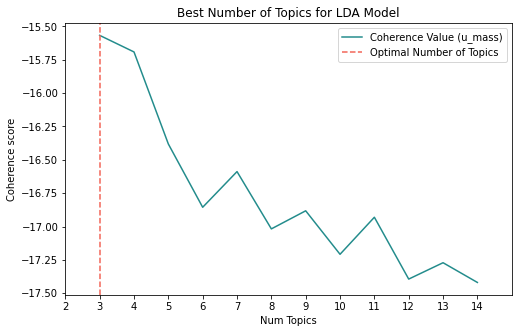

In [76]:
plt.figure(figsize=(8,5))

# Create a custom x-axis
x = range(start, limit, step)

# Build the line plot
ax = sns.lineplot(x=x, y=coherence_values, color='#238C8C')

# Set titles and labels
plt.title("Best Number of Topics for LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.xlim(start, limit)
plt.xticks(range(2, limit, step))

# Add a vertical line to show the optimum number of topics
plt.axvline(x[np.argmax(coherence_values)], 
            color='#F26457', linestyle='--')

# Draw a custom legend
legend_elements = [Line2D([0], [0], color='#238C8C', 
                          ls='-', label='Coherence Value (u_mass)'),
                   Line2D([0], [1], color='#F26457', 
                          ls='--', label='Optimal Number of Topics')]

ax.legend(handles=legend_elements, loc='upper right')

## From the above chart we can see that the optimal number of topics is 3